In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate # for problem 3 cubic spline interpolation

# Problem 1

*Evaluate a function $f$ at 4 points: $x \pm \delta$ and $x \pm 2 \delta$.*

*(a) Combine derivative for $x \pm \delta$ and derivative for $x \pm 2 \delta$ to cancel terms in the Taylor series.*

*(b) What should $\delta$ be in terms of machine precision and various properties of the function? Show for $f(x) = exp(x)$ and $f(x) = (0.01x)$ that estimate for optimal $\delta$ is correct.*

## (a)

Derivative from $x \pm \delta$: $f'(x) = \frac{f(x+\delta) - f(x-\delta) }{2 \delta}$

Taylor expand: 

$\frac{f(x+\delta) - f(x-\delta) }{2 \delta} = \frac{1}{2 \delta}(f(x) + \delta f'(x) + \frac{\delta^2}{2} f''(x) + \frac{\delta^3}{3!} f'''(x) + ...) -\frac{1}{2 \delta}( f(x) - \delta f'(x) +  \frac{\delta^2}{2} f''(x) - \frac{\delta^3}{3!} f'''(x) + \frac{\delta^5}{5!}f^{(5)} + ...)$

Cancel terms (even terms cancel out): 

$\frac{f(x+\delta) - f(x-\delta) }{2 \delta} = f'(x) + \frac{2\delta^2}{12} f'''(x) + \frac{2\delta^4}{5!*2}f^{(5)}(x) + ...$

==> $f'(x) = \frac{f(x+\delta) - f(x-\delta) }{2 \delta} -\frac{\delta^2}{6} f'''(x) - \frac{\delta^4}{120}f^{(5)}(x) - ... $ $(*)$ 


Derivative from $x \pm 2\delta$: $f'(x) = \frac{f(x+2\delta) - f(x-2\delta) }{4 \delta}$

Taylor expand:

$\frac{f(x+2\delta) - f(x-2\delta) }{4 \delta} = \frac{1}{4 \delta}(f(x) + 2\delta f'(x) + \frac{4\delta^2}{2} f''(x) + \frac{8\delta^3}{3!} f'''(x) + \frac{32\delta^5}{5!}f^{(5)}+ ...) -\frac{1}{4 \delta}( f(x) - 2\delta f'(x) +  \frac{4\delta^2}{2} f''(x) - \frac{8\delta^3}{3!} f'''(x) + \frac{32\delta^5}{5!}f^{(5)} + ...)$

Cancel terms (again, odds stay):

$\frac{f(x+2\delta) - f(x-2\delta) }{4 \delta} = f'(x) + \frac{16\delta^2}{24} f'''(x) + \frac{64 \delta^4}{4*5!}f^{(5)}(x) + ...$ 

==> $ f'(x) = \frac{f(x+2\delta) - f(x-2\delta) }{4 \delta} - \frac{2\delta^2}{3} f'''(x) - \frac{2 \delta^4}{15}f^{(5)}(x) - ... $ $(**)$


Cancel $\delta^3$ term by taking $4(*) - (**)$:

$ 4f'(x) - f'(x) \approx  \frac{4f(x+\delta) - 4f(x-\delta) }{2 \delta} -\frac{4\delta^2}{6} f'''(x) - \frac{4\delta^4}{120}f^{(5)}(x) - \frac{f(x+2\delta) - f(x-2\delta) }{4 \delta} + \frac{2\delta^2}{3} f'''(x) + \frac{2 \delta^5}{15}f^{(5)}(x)$

==> $3f'(x) \approx \frac{8f(x+\delta) - 8f(x-\delta) - (f(x+2\delta) - f(x-2\delta)) }{4 \delta} + \frac{ \delta^4}{10}f^{(5)}(x)$

==> $ f'(x) \approx \frac{8f(x+\delta) - 8f(x-\delta) - (f(x+2\delta) - f(x-2\delta)) }{12 \delta} + \frac{ \delta^4}{30}f^{(5)}(x)$

## (b)

Errors are due to both the roundoff (numerical accuracy) and the Taylor series error. The Taylor series error is from the $\delta^4$ term in $f'(x) \approx \frac{8f(x+\delta) - 8f(x-\delta) - (f(x+2\delta) - f(x-2\delta)) }{12 \delta} + \frac{ \delta^4}{30}f^{(5)}(x)$. The roundoff error is due to the other term, which ~ $\frac{\epsilon f(x)}{12\delta}$. $\epsilon$ is the machine accuracy (1e-16 for double precision).

The total error (E) is then:

$E = \frac{\epsilon f(x)}{12\delta} + \frac{ \delta^5}{30}f^{(5)}(x)$

Differentiate error with respect to $\delta$ and set to zero to find minimum step size: $\frac{dE}{d\delta} = 0$

$0 = -\frac{f(x) \epsilon}{12 \delta^2} + \frac{4 \delta^3 f^{(5)}(x)}{30}$ 

Solve for $\delta$ (minimum step size):

$\frac{f \epsilon}{12} = \frac{2 f^{(5)}(x) \delta^{5}}{15}$

==> $\delta = (\frac{5f(x) \epsilon}{8 f^{(5)}(x)})^{\frac{1}{5}}$

Derivative of exp(x) is exp(x), so using answer from (a) to get the derivative using $\delta$ answer from (b) should match with exp(x) with low error.

For exp(x) specifically, $\delta$ becomes: $\delta = (\frac{5 \epsilon}{8})^{\frac{1}{5}}$ (constant).

optimal $\delta$ =  0.0005743491774985172
optimal $\delta$ =  0.0005743491774985172


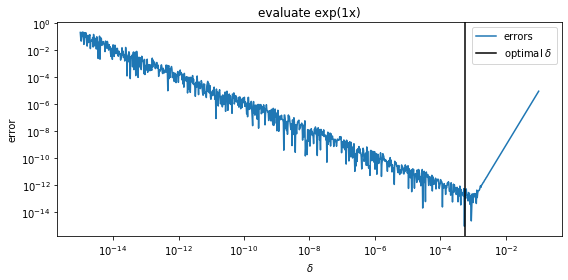

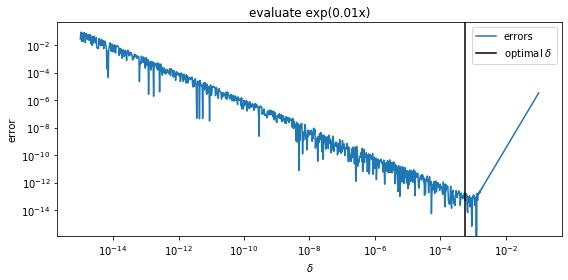

In [2]:
# look at different values of delta and see if it matches the result from (b)

for frac_x in [1, 0.01]: # evaluate exp(x) and exp(0.01x)
    
    epsilon = 1e-16 # define epsilon (machine accuracy)
    x = 1*frac_x # get a constant x value
    fun = np.exp # set the function

    
    delta = ((5*epsilon)/8)**(1/5) # get delta using known f(x0), f^(5)(x0)
    print('optimal $\delta$ = ', delta)
    
    # calculate the derivative for an array of deltas
    logdeltas=np.linspace(-15,-1,1001)
    deltas=10**logdeltas
    
    # get the true derivative of exp(x) evaluated at x
    y_true = fun(x+0*deltas) # make it an array
    
    # evaluate estimate of first derivative, do numerator in chunks
    y1 = 8*fun(x+deltas)
    y2 = -8*fun(x-deltas)
    y3 = -fun(x+2*deltas)
    y4 = fun(x-2*deltas)
    
    # put them together
    y_estimate = (y1+y2+y3+y4)/(12*deltas)
    
    # error = absolute difference between truth and estimate
    errs = np.abs(y_estimate-y_true) 
    
    # plot error against deltas
    fig, (ax) = plt.subplots(1,1,figsize=(8,4), sharex=False, tight_layout=True)
    ax.loglog(deltas, errs, label='errors') 
    ax.axvline(delta, label='optimal $\delta$', c='k')
    ax.legend()
    ax.set_title('evaluate exp({}x)'.format(frac_x))
    ax.set_ylabel('error')
    ax.set_xlabel('$\delta$')
    
    plt.savefig('problem1_plots_errors_exp{}x.png'.format(frac_x))

Fig: For both exp(x) and exp(0.01x), the optimal $\delta$ is very close to the minimum error (where the Taylor error and machine error meet).

# Problem 2

*Write a function "ndiff(fun,x,full=False)". If full=False, ndiff returns the numerical derivative at x. If full=True, ndiff returns the derivative, dx, and an error estimate on the derivative. Estimate the optimal dx, write it so it takes in an array of x's.*

We saw that the two-sided derivative had the optimal step size: dx = $(\frac{f(x) \epsilon}{f'''(x)})^{\frac{1}{3}}$. If we had a defined $f'''$ then we could use that (but we don't). So I assume that the ratio $\frac{f(x)}{f'''(x)} \approx 1$ and estimate $dx \approx \epsilon^{\frac{1}{3}}$.

Since we're estimating the first derivative by centering (two-sided derivative), we saw that the error from the Taylor serious expansion was ~$ f'''(x)dx^2$. Since $f'''(x)$ isn't known, I'm going to approximate the Taylor series error as ~$dx^2$.

The machine error is ~$\frac{f(x) \epsilon}{dx}$.

The total error estimate is then the sum: $E \approx \frac{f(x) \epsilon}{dx} + dx^2$. 

In [3]:
def ndiff(fun,x,full=False):
    
    """
    Parameters:
    fun = a function
    x = an array of numbers
    
    Returns:
    dx = array of optimal steps to evaluate the numerical derivative
    f1 = array of numerical first derivatives
    err = estimate on the error
    """
    
    f1, err = [],[] # initialize arrays of first derivatives and errors
    for i in range(len(x)):
        
        # set x and dx to evaluate the derivative:
        x0 = x[i] # look at one x at a time
        f_f3 = 1 # let ratio of f/f''' = 1
        epsilon = 1e-16 # machine accuracy
        dx = (f_f3*epsilon)**(1/3) # step size
        
        # get numerical first derivative:
        f1_0 = (fun(x0+dx) - fun(x0-dx))/(2*dx)
        f1.append(f1_0) # append derivatives
        
        # estimate error 
        machine_err = fun(x0)*epsilon/dx
        Taylor_err = dx**2
        tot_err = machine_err + Taylor_err
        err.append(tot_err) # append errors for each f'(x)
        
        
    if full==False:
        return f1
    elif full==True:
        return f1, dx, err

Test this with a couple functions (Say exponential and sine):

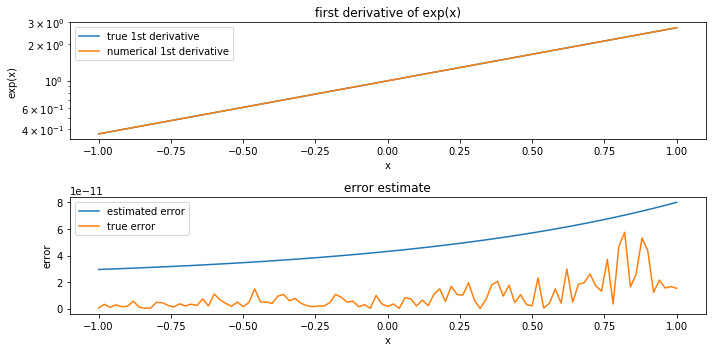

In [4]:
# test ndiff using np.exp 

fun = np.exp
x = np.linspace(-1,1,101)
f1_true = fun(x)
f1_numerical, dx, err = ndiff(fun,x,full=True)

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(10,5),tight_layout=True)
ax1.semilogy(x,f1_true,label='true 1st derivative')
ax1.semilogy(x,f1_numerical,label='numerical 1st derivative')
ax1.legend()
ax1.set_title('first derivative of exp(x)')
ax1.set_ylabel('exp(x)')
ax1.set_xlabel('x')

ax2.plot(x, err, label='estimated error')
ax2.plot(x, np.abs(f1_true-f1_numerical), label='true error') # plot difference between true and estimated f'(x)
ax2.legend()
ax2.set_title('error estimate')
ax2.set_xlabel('x')
ax2.set_ylabel('error')

plt.savefig('problem2_testing_ndiff_w_exp.png')

Fig: estimated errors are around the same order of magnitude as the true errors (but start to diverge at larger x-values).

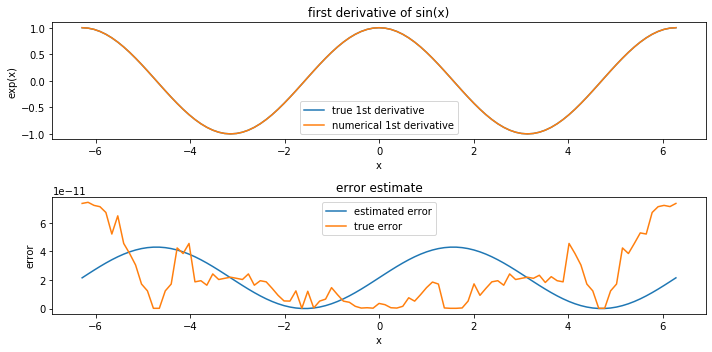

In [5]:
# test ndiff using np.sin

fun = np.sin
x = np.linspace(-2*np.pi,2*np.pi,101)
f1_true = np.cos(x) # first derivative of sin(x) is cos(x)
f1_numerical, dx, err = ndiff(fun,x,full=True)

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(10,5),tight_layout=True)
ax1.plot(x,f1_true,label='true 1st derivative')
ax1.plot(x,f1_numerical,label='numerical 1st derivative')
ax1.legend()
ax1.set_title('first derivative of sin(x)')
ax1.set_ylabel('exp(x)')
ax1.set_xlabel('x')

ax2.plot(x, err, label='estimated error')
ax2.plot(x, np.abs(f1_true-f1_numerical), label='true error') # plot difference between true and estimated f'(x)
ax2.legend()
ax2.set_title('error estimate')
ax2.set_xlabel('x')
ax2.set_ylabel('error')

plt.savefig('problem2_testing_ndiff_w_sine.png')

Fig: Estimated errors are around the same magnitude as the true errors

# Problem 3

*Lakeshore diodes are fed with constant 10 $\mu$A current and read out voltage, which is converted to temperature from a chart. Write a prototype "def lakeshore(V, data)" to interpolate the temperature from the voltage and make a (rough) quantitative error estimate. Read in data with "dat=np.loadtxt('lakeshore.txt')", which has columns: (1) temperature T, (2) V(T), (3) dV/dT.*

Should be able to use a cubic spline to get $V=V(T)$ for an arbitrary $V$, but are the first and second derivatives continuous? Look at $V'=\frac{dV}{dT}$ (given) and $V''=\frac{d^2V}{dT^2}$ (linear estimate):

$V'' = \frac{V'(T_{i+1} - V'(T_{i}))}{T_{i+1} - T_{i}}$

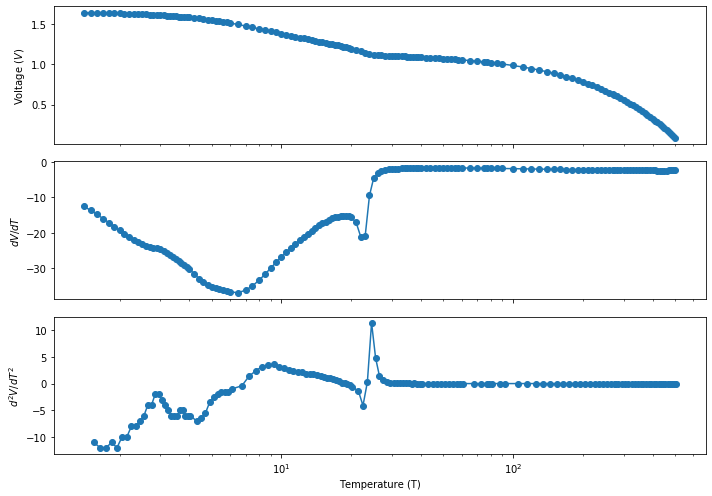

In [6]:
# Take a look at dV/dT, T, V

# load data and name the columns
dat = np.loadtxt('lakeshore.txt')
T,V,V1 = dat[:,0],dat[:,1],dat[:,2]

# linear estimate of V'':
V2 = [(V1[i]-V1[i-1])/(T[i]-T[i-1]) for i in np.arange(1,len(V1))]
# get midpoints of T to match the second derivatives:
T2 = [T[i] + (T[i]-T[i-1])/2 for i in np.arange(1,len(V1))] 

# plot
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(10,7), sharex=True, tight_layout=True)
ax1.semilogx(T,V, marker='o')
ax1.set_ylabel('Voltage ($V$)')
ax2.plot(T,V1, marker='o')
ax2.set_ylabel('$dV/dT$')
ax3.plot(T2,V2, marker='o')
ax3.set_ylabel('$d^2V/dT^2$')
ax3.set_xlabel('Temperature (T)')
fig.savefig('problem3_voltage_and_derivatives.png')

Fig: the voltage is smooth and the first derivative is continuous. The estimated second derivative has a spike but is still continuous (so can use a cubic spline).

Interpolate $V(T)$ using a cubic spline from scipy. Estimated error on $T$ is described:

To find the $T$ that corresponds to $V=V(T)$, I make a finely spaced array of voltages and choose the one that is closest to the input $V$ ("$V_{close}$"). Then I find the temperature that corresponds to $V_{close}$. The error in the voltage is then roughly the difference $V-V_{close}$. I'm roughly estimating the error in temperature as half the distance between $T_i$ and $T_j$, where $T_i$ corresponds to the closest voltage to $V$ and $T_j$ corresponds to the next closest voltage.

In [7]:
# define the function to interpolate V=V(T)

def lakeshore(V,data):
    """
    Parameters:
    V = arbitrary voltage
    data = lakeshore data, which includes voltage V, temperature T, and dV/dT
    
    Returns:
    T = temperature corresponding to input voltage V
    err = estimated error on T
    plots the interpolation and the real data
    """
    
    # read in data and name the columns
    dat = np.loadtxt('lakeshore.txt')
    temp,voltage,dVdT = dat[:,0],dat[:,1],dat[:,2]

    # use a cubic spline to interpolate T from V
    # (code is adapted from class: spline_example.py and spline_class.py)
    t,v = temp,voltage
    
    # get more finely spaced temperatures for the interpolation
    tt=np.linspace(t[0],t[-1],2001) # make more finely spaced x-values for the spline
    spln=interpolate.splrep(t,v)  # generate spline using scipy
    vv=interpolate.splev(tt,spln) # evaluate the spline on fine x
    
    # V should be an array even if it's just a single number
    plot_label = []
    if isinstance(V, float):
        V_arr = [V]
        plot_label = 'numberV'
    elif isinstance(V, np.ndarray):
        V_arr = V 
        plot_label = 'arrayV'
    
    # cycle through V's to find closest vv. Use that index to get T in V(T)
    closest_inds, V_errs, T_errs = [],[],[]
    for i in range(len(V_arr)):
        V_i = V_arr[i]
        V_diffs = np.abs(vv-V_i) # difference between given V and vv
        ind0 = np.argpartition(V_diffs, 0)[0] # index of minimum distance
        ind1 = np.argpartition(V_diffs, 1)[1] # index of next smallest distance
        closest_inds.append(ind0) # append indices with closest vv's
        V_err = V_diffs[ind0] # difference in V and closest vv is the error in V
        V_errs.append(V_err) # append errors in V
        # error in T is half the difference between closest temperatures:
        T_err = 0.5*np.abs(tt[ind1]-tt[ind0]) 
        T_errs.append(T_err) # append errors in T
        
    # closest voltage and temperature:
    v_close = vv[closest_inds]
    t_close = tt[closest_inds]
    
    # rename variables
    T, err = t_close, T_errs 
    
    # plot given temperatures, voltage, interpolated V=V(T)
    plt.figure(figsize=(10,4))
    plt.semilogx(t,v, marker='+', ls='', label='lakeshore data')
    plt.semilogx(tt,vv, label='interpolation')
    plt.semilogx(T,v_close, marker='o', ls='', label='given V, found T')
    plt.legend()
    plt.ylabel('voltage (V)')
    plt.xlabel('temperature (T)')
    plt.savefig('problem3_interpolated_{}_T.png'.format(plot_label))
    
    return T, err

Check that the function works, use both a number and an array as the input for V.

array V:
For voltage = 0.2, temperature is 452.88230000000004 with error 0.12465000000000259
For voltage = 0.35555555555555557, temperature is 387.3164 with error 0.12465000000000259
For voltage = 0.5111111111111111, temperature is 321.00260000000003 with error 0.12465000000000259
For voltage = 0.6666666666666667, temperature is 252.94370000000004 with error 0.12465000000000259
For voltage = 0.8222222222222222, temperature is 182.1425 with error 0.12465000000000259
For voltage = 0.9777777777777779, temperature is 104.85950000000001 with error 0.12465000000000259
For voltage = 1.1333333333333333, temperature is 23.3384 with error 0.12465000000000082
For voltage = 1.288888888888889, temperature is 14.363600000000002 with error 0.12464999999999993
For voltage = 1.4444444444444444, temperature is 7.8818 with error 0.12464999999999993
For voltage = 1.6, temperature is 3.3944 with error 0.12464999999999993
number V:
For voltage = 1.15, temperature is [22.5905] with error [0.12464999999999904

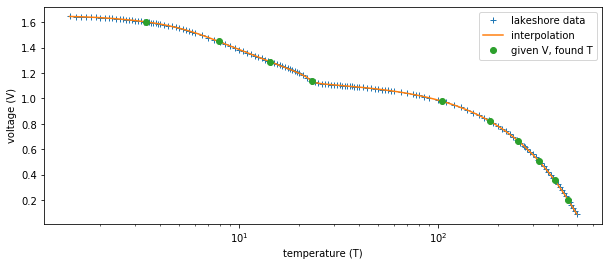

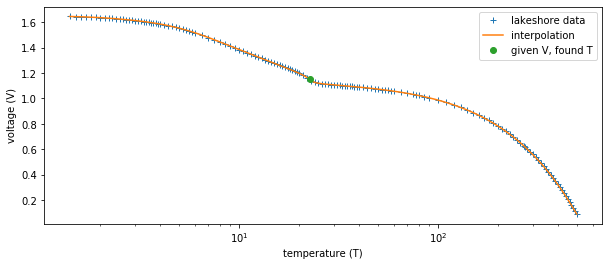

In [8]:
# load the data and test with V as an array and as a number

dat = np.loadtxt('lakeshore.txt')

# array of voltages
V_in = np.linspace(0.2,1.6,10)
T, err = lakeshore(V=V_in,data=dat)
# print the results
print('array V:')
for i in range(len(V_in)):
    print('For voltage = {}, temperature is {} with error {}'.format(V_in[i], T[i], err[i]))

# voltage is a number
V_in = 1.15
T, err = lakeshore(V=V_in,data=dat)
# print the result
print('number V:')
print('For voltage = {}, temperature is {} with error {}'.format(V_in, T, err))

Fig: Given $V$ and corresponding $T$ match the points on interpolation. The interpolation is close to the Lakeshore data.

# Problem 4

*Using the function cos(x) between $-\pi/2$ and $\pi/2$, compare the accuracy of (1) polynomial, (2) cubic spline, and (3) rational function interpolation given some points x (same for all 3 interpolations).*

*Repeat for the Lorentzian $\frac{1}{1+x^2}$ between -1 and 1. Find the expected error for the Lorentzian from the rational fit. See if it agrees with results when order is higher (n,m=4,5). Try both np.linalg.inv and np.linalg.pinv. Relate what's happening to $p$ and $q$.*

Define a function to make the plots of the interpolation and their errors for either function:

In [9]:
# define a Lorentzian function
def Lorentz(x):
    return 1/(1+x**2)

def compare_interpolations(fun, npts, invert, n=2, m=3, extra_label=''):
    """
    Parameters:
    fun = function to interpolate (either cos or Lorentzian)
    npts = number of points to use for interpolations
    invert = type of matrix invert (find inverse or pseudo inverse)
    n, m = order of polynomials (n: numerator, m: denominator) in the rational function
    extra_label = extra label to save plots for the higher order case with linalg.inv vs linalg.pinv
    
    Returns:
    y = interpolation result
    Plots interpolation, true function, and accuracy (difference between truth and interpolation)
    """

    # set initial x and y for either function
    if fun==np.cos:
        xi, xf = -0.5*np.pi, 0.5*np.pi # x limits
        plot_label = 'cosine' # to name the plots
    elif fun==Lorentz:
        xi, xf = -1, 1 # x limits
        plot_label = 'Lorentzian' # to name the plots
    x = np.linspace(xi, xf, npts)
    y = fun(x)
    
    # more finely spaced x and y = true y = fun(xfine)
    xfine = np.linspace(x[0], x[-1], 1001)
    yfine = fun(xfine)
    
    # polynomial interpolation (using numpy.polyfit):
    order = 10 # take order 10?
    fitpoly = np.polyfit(x,y,deg=order)
    # polynomial results:
    y_poly = np.polyval(fitpoly,xfine)
    err_poly = yfine-y_poly

    # cubic spline interpolation:
    spln = interpolate.splrep(x,y)  # generate spline using scipy
    # cubic spline results:
    y_spline = interpolate.splev(xfine,spln) # evaluate the spline on fine x
    err_spline = yfine-y_spline
    
    # rational function interpolation (using code from class: ratfit_class.py):
    # fill the left hand side of the matrix with P columns:
    pcols=[x**k for k in range(n+1)] 
    pmat=np.vstack(pcols)
    # fill the right hand side of the matrix with Q columns:
    qcols=[-x**k*y for k in range(1,m+1)]
    qmat=np.vstack(qcols)
    # combine them horizontally:
    mat=np.hstack([pmat.T,qmat.T])
    # get coefficients from P_{qq}=A^-1y
    # (use the inverse or the pseudo inverse):
    coeffs=invert(mat)@y 
    # construct the rational function interpolation using the coefficients
    # numerator:
    p=0
    for i in range(n+1):
        p=p+coeffs[i]*xfine**i
    # denominator:
    qq=1
    for i in range(m):
        qq=qq+coeffs[n+1+i]*xfine**(i+1)
    # rational function results:
    y_rat = p/qq 
    err_rat = yfine-y_rat
    
    # plot everything
    all_y = [y_poly, y_spline,y_rat, err_poly, err_spline, err_rat]
    labels = ['poly', 'spline', 'rational', 'poly error', 'spline error', 'rational error']
    fig, axs = plt.subplots(2,3,figsize=(12,7), tight_layout=True)
    axs = axs.ravel()
    axs[1].set_title('interpolations with {} function\n'.format(plot_label), fontsize=14)
    for i in range(len(all_y)):
        axs[i].plot(xfine,all_y[i], label='interpolation')
        axs[i].set_ylabel(labels[i])
        axs[i].set_xlabel('x')
    for i in range(3):
        axs[i].plot(x,y, marker='o', ls='', label='given points')
        axs[i].plot(xfine,yfine, label='true function')  
        axs[i].legend()
        
    fig.savefig('problem4_function_{}{}.png'.format(plot_label, extra_label))

Compare interpolations for cosine function. Rational function uses the inverse matrix:

/home/taylordb/anaconda3/envs/hera_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


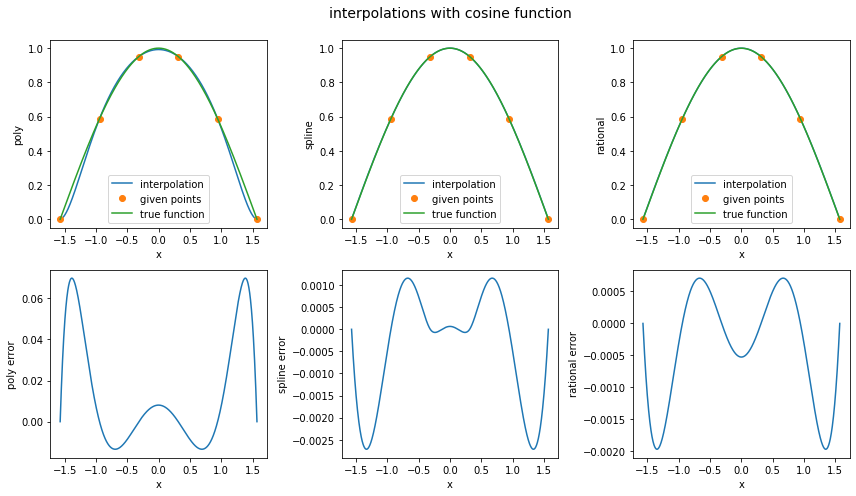

In [10]:
compare_interpolations(np.cos,npts=6,invert=np.linalg.inv)

Compare interpolations for the Lorentzian function. Rational function uses the inverse matrix. Had to tweak the orders of the numerator and denominator for the rational function (instead of n,m=2,3 like above, I use n,m=3,2).

/home/taylordb/anaconda3/envs/hera_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


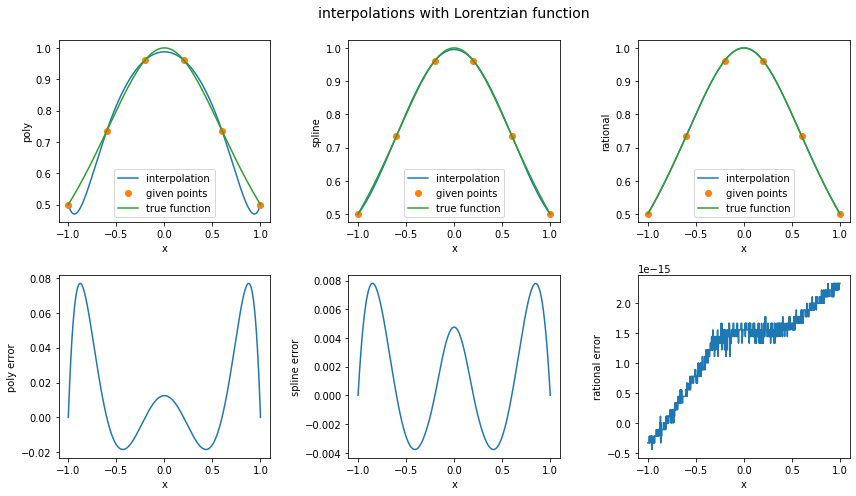

In [11]:
compare_interpolations(Lorentz,npts=6,invert=np.linalg.inv, n=3,m=2)

Compare Lorentzian with higher order: n,m=4,5. Inverse matrix is followed by pseudo inverse matrix:

/home/taylordb/anaconda3/envs/hera_env/lib/python3.7/site-packages/ipykernel_launcher.py:3: RankWarning: Polyfit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until
/home/taylordb/anaconda3/envs/hera_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.


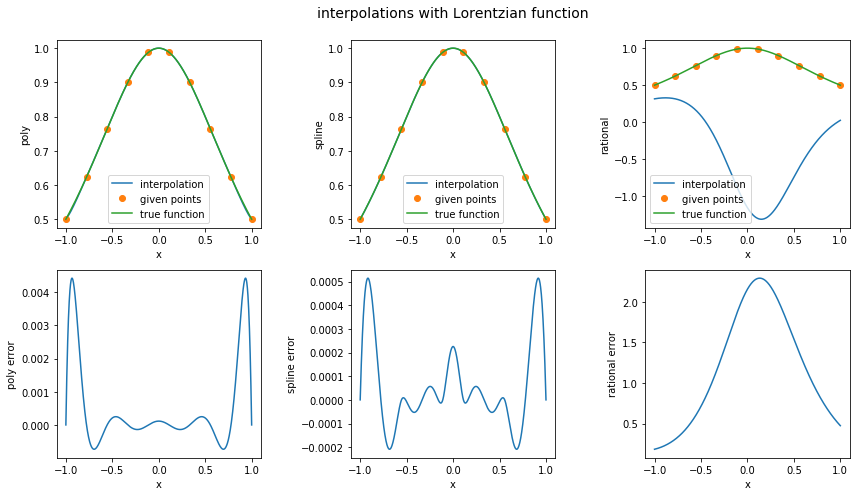

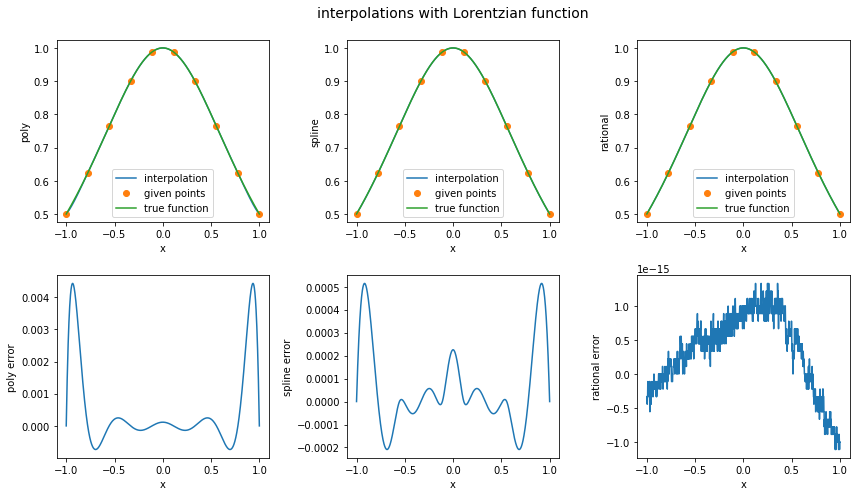

In [12]:
# need to have npts = n + m + 1 so now npts=10

compare_interpolations(Lorentz,npts=10,invert=np.linalg.inv,n=4,m=5,extra_label='highorder_inv')
compare_interpolations(Lorentz,npts=10,invert=np.linalg.pinv,n=4,m=5,extra_label='highorder_pinv')

Switching from inverse to pseudo inverse takes the interpolation from not matching at all to matching almost perfectly (error of ~1e-15, pretty much the machine accuracy for subtracting numbers).